## This comparison is done with a Laser Ball
## I modified the emission profile to be flat between 320 and 550 nm (fake N2)


In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/geo_validation'

In [3]:
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')

In [4]:
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [5]:
basedir = '/home/jp/projects/snoplus/rundir/laserball'
fname = 'laserball.root'

In [6]:
# SNOPLUS official
dirname = 'snoplus'
file_name = os.path.join(basedir, dirname, fname)
print file_name
sno = lowlevel_stats.getMChits(file_name)
sno_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
sno_petimes  = lowlevel_stats.getPETimes_MC(file_name)
sno_wlen     = lowlevel_stats.getPhotonWlen(file_name)
sno_wlenpmt, sno_trackid  = lowlevel_stats.getPMTWlen(file_name)
sno_q, sno_peid = lowlevel_stats.getPEinfo(file_name)

/home/jp/projects/snoplus/rundir/laserball/snoplus/laserball.root


In [15]:
sno_trackid.size, np.unique(sno_trackid).size

(63981, 59267)

In [7]:
# Find the single photons
multiple_pe = 0
sno_pewlen = np.zeros_like(sno_q)
for i, pid in enumerate(sno_peid):
    index = np.where(pid == sno_trackid)[0]
    if len(index) == 1:
        sno_pewlen[i] = sno_wlenpmt[index[0]]
    else:
        multiple_pe +=1
print sno_peid.size, multiple_pe

6776 440


In [8]:
# SNOPLUS greydisc
dirname = 'snoplus_greydisc'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogd = lowlevel_stats.getMChits(file_name)
snogd_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogd_petimes  = lowlevel_stats.getPETimes_MC(file_name)
snogd_wlen     = lowlevel_stats.getPhotonWlen(file_name)
snogd_wlenpmt, snogd_trackid  = lowlevel_stats.getPMTWlen(file_name)
snogd_q, snogd_peid = lowlevel_stats.getPEinfo(file_name)

/home/jp/projects/snoplus/rundir/laserball/snoplus_greydisc/laserball.root


In [14]:
snogd_trackid.size, np.unique(snogd_trackid).size

(64925, 59473)

In [16]:
# Find the single photons
gdmultiple_pe = 0
snogd_pewlen = np.zeros_like(snogd_q)
for i, pid in enumerate(snogd_peid):
    index = np.where(pid == snogd_trackid)[0]
    if len(index) == 1:
        snogd_pewlen[i] = snogd_wlenpmt[index[0]]
    else:
        multiple_pe +=1
print snogd_peid.size, gdmultiple_pe

5239 0


## Checking the NHits distribution

In [23]:
mycolors = ['b','r','g','k','m','c']
def plotNhits(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(3000, 6000, 100)

    nbins = []
    for i, one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'SUM ', one_nhits.sum()
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

        
        
    plt.xlabel('Nhits (Laserball with flat spectrum)')
    plt.ylabel('Entries per event')
    
    #plt.ylim([0,])
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SUM  4822
Mean  4822.0
Std   0.0
SUM  3951
Mean  3951.0
Std   0.0
SNO
SNO GreyDisc


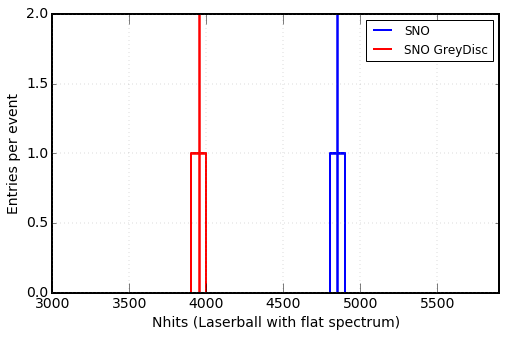

In [24]:
plotNhits([sno, snogd],[1., 1], ['SNO','SNO GreyDisc'], 
          'LBall_SNO_official_vs_greydisc')

In [1]:
4822/3951.

1.2204505188559858

## Checking the hit times distribution

In [42]:
mycolors = ['b','r','g','k','m','c']
def plotTOA(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(100, 250, 3)#20, 4000)

    nbins = []
    for i,one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

        
    plt.xlabel('Hit time (ns, Laserball with flat spectrum)')
    plt.ylabel('Hits')        

    plt.yscale('log')
    #plt.ylim([0,])
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

Mean  154.486288174
Std   27.9347865739
Mean  155.205017397
Std   30.2424601992
SNO
SNO GreyDisc


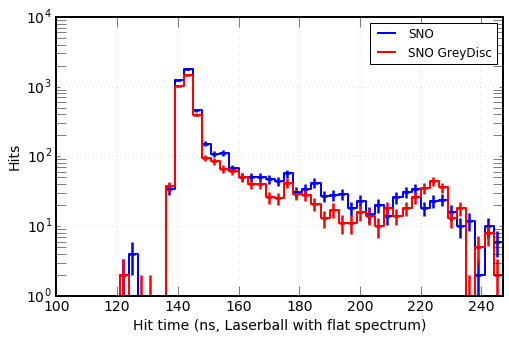

In [43]:
plotTOA([sno_hittimes, snogd_hittimes],[1., 1], ['SNO','SNO GreyDisc'], 
          'LBall_TOA_SNO_official_vs_greydisc')

In [33]:
mycolors = ['b','r','g','k','m','c']
def plotWlen(wlen_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(300,700, 10)#20, 4000)

    nbins = []
    for one_nhits in wlen_list:
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)

        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

        
    plt.xlabel('wavelength (nm)')
    plt.ylabel('Photons produced')        

    
    #plt.ylim([0,])
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SNO
SNO GreyDisc


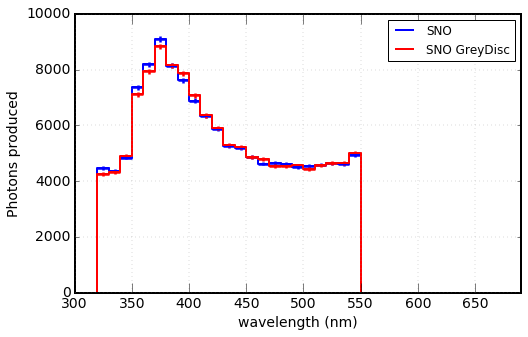

In [34]:
plotWlen([sno_wlen, snogd_wlen],[1., 1], ['SNO','SNO GreyDisc'], 
          'LBall_WlenPhoton_SNO_official_vs_greydisc')

SNO
SNO GreyDisc


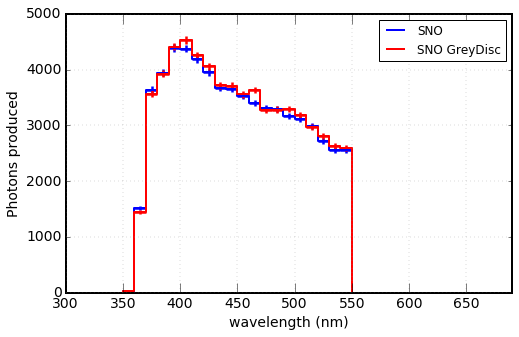

In [35]:
plotWlen([sno_wlenpmt, snogd_wlenpmt],[1., 1], ['SNO','SNO GreyDisc'], 
          'LBall_WlenPMT_SNO_official_vs_greydisc')

In [40]:
mycolors = ['b','r','g','k','m','c']
def plotWlenQ(wlen_list = [], q_list = [], scale_factor = [], 
              labels = [], figname = ''):
    xaxis = np.arange(300,700, 20)#20, 4000)

    nbins = []
    for i, one_nhits in enumerate(wlen_list):
        n, x = np.histogram(one_nhits, xaxis, weights = q_list[i])
        nbins.append(n)

        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]
    plt.xlabel('wavelength (nm)')
    plt.ylabel('Photons produced') 
    
    myfig2 = plt.figure(figsize=(8,5))
    for i in range(len(nbins)-1):
        jplot.unfilledBar(xaxis, nbins[i+1]/nbins[i],
                         color = mycolors[i])

        
       

    
    #plt.ylim([0,])
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SNO
SNO GreyDisc


/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide
/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide
/home/jp/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


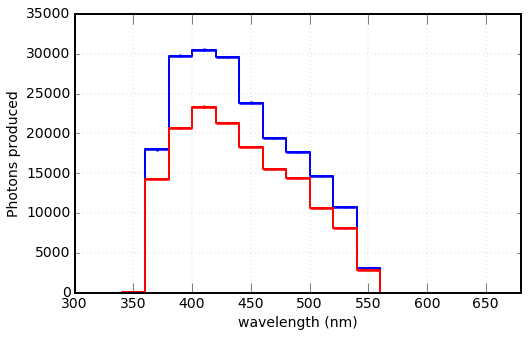

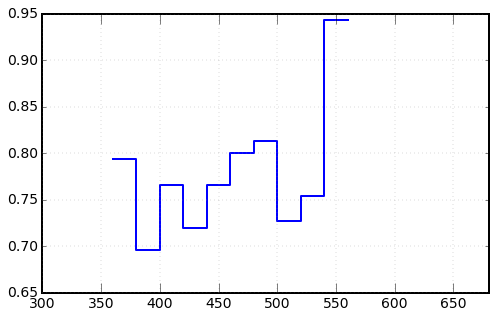

In [41]:
plotWlenQ([sno_pewlen, snogd_pewlen], [sno_q, snogd_q],
            [1., 1], ['SNO','SNO GreyDisc'])

In [53]:
elist = []
def ftest(ratreader):
    for ds, run in ratreader:
        mymc = ds.GetMC()
        for pmt_index in range(mymc.GetMCPMTCount()):
            mypmt = mymc.GetMCPMT(pmt_index)
            if mypmt.GetMCPhotonCount() > 1:
                return mypmt, mymc
            #for photon_index in range(mypmt.GetMCPhotonCount()):
            #    elist.append(mypmt.GetMCPhoton(photon_index).GetEnergy())

In [54]:
try:
    ratreader.close()
except:
    print 'Nothing to close'
ratreader = rat.dsreader(file_name)
pmt, mc = ftest(ratreader)


In [55]:
pmt

<ROOT.RAT::DS::MCPMT object ("RAT::DS::MCPMT") at 0x65c5b48>

In [56]:
pmt.GetMCPhotonCount()

5L

In [57]:
photon = pmt.GetMCPhoton(0)

In [66]:
mcpe = pmt.GetMCPE(0)

In [59]:
mcpe.GetCharge()

21.51618766784668

In [60]:
trackid = mcpe.GetPhotonTrackID()

In [61]:
trackid

4083L

In [28]:
track = mc.GetMCTrack(trackid)

In [29]:
track.GetTrackID()

10610L

In [62]:
photon.GetPhotonTrackID()

9861

In [63]:
pmt.GetMCPECount()

1L

In [64]:
pmt.GetMCPhotonCount()

5L

In [67]:
mcpe.GetPhotonTrackID()

4083L

In [68]:
np.where(sno_trackid == 4083)

(array([3]),)